# Predicting the Sale Price of Bulldozers using Machine Learning 🚜

This notebook looks into using various Python-based machine learning and data science libraries in an attempt ot build a machine learning model capable of predicting the sale price of bulldozers.

1. Problem definition

2. Data

3. Evaluation

4. Features

5. Modeling

## 1. Problem Definition

In a statement,
> Given parameters about a bulldozer, and previous examples of how much similar bulldozers have been sold for, can we predict it's future sale price?

## 2. Data

Looking at the [dataset from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data), we understand that this project is a time series problem, meaning it includes a time attribute. It consists of historical sales data of bulldozers, including model type, size, sale date, and more. There are three datasets:

There are 3 datasets:
1. **Train.csv** - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including `SalePrice` which is the **target variable**).
2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as **Train.csv**).
3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the `SalePrice` attribute, as this is what we'll be trying to predict).

## 3. Evaluation

For this problem, [Kaggle has set the evaluation metric to being root mean squared log error (RMSLE)](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation). 

As with many regression evaluations, the goal will be to get this value as low as possible.

## 4. Features

The following are the features will be used to predict the target variable (sale price).
1. **SalesID**: Unique identifier of a particular sale of a machine at auction
2. **MachineID**: Identifier for a particular machine; machines may have multiple sales
3. **ModelID**: Identifier for a unique machine model (i.e. fiModelDesc)
4. **datasource**: Source of the sale record; some sources are more diligent about reporting attributes of the machine than others. Note that a particular datasource may report on multiple auctioneerIDs.
5. **auctioneerID**: Identifier of a particular auctioneer, i.e. the company that sold the machine at auction. Not the same as datasource.
6. **YearMade**: Year of manufacturer of the Machine
7. **MachineHoursCurrentMeter**: Current usage of the machine in hours at the time of sale (saledate); null or 0 means no hours have been reported for that sale
8. **UsageBand**: Value (low, medium, high) calculated comparing this particular Machine-Sale hours to the average usage for the fiBaseModel; e.g., "Low" means this machine has fewer hours given its lifespan relative to the average of fiBaseModel.
9. **Saledate**: Time of sale
10. **Saleprice**: Cost of sale in USD
11. **fiModelDesc**: Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor
12. **fiBaseModel**: Disaggregation of fiModelDesc
13. **fiSecondaryDesc**: Disaggregation of fiModelDesc
14. **fiModelSeries**: Disaggregation of fiModelDesc
15. **fiModelDescriptor**: Disaggregation of fiModelDesc
16. **ProductSize**: Don't know what this is
17. **ProductClassDesc**: Description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc
18. **State**: US State in which the sale occurred
19. **ProductGroup**: Identifier for the top-level hierarchical grouping of fiModelDesc
20. **ProductGroupDesc**: Description of the top-level hierarchical grouping of fiModelDesc
21. **Drive_System**: Machine configuration; typically describes whether 2 or 4 wheel drive
22. **Enclosure**: Machine configuration - does the machine have an enclosed cab or not
23. **Forks**: Machine configuration - attachment used for lifting
24. **Pad_Type**: Machine configuration - type of treads a crawler machine uses
25. **Ride_Control**: Machine configuration - optional feature on loaders to make the ride smoother
26. **Stick**: Machine configuration - type of control
27. **Transmission**: Machine configuration - describes the type of transmission; typically automatic or manual
28. **Turbocharged**: Machine configuration - engine naturally aspirated or turbocharged
29. **Blade_Extension**: Machine configuration - extension of the standard blade
30. **Blade_Width**: Machine configuration - width of the blade
31. **Enclosure_Type**: Machine configuration - does the machine have an enclosed cab or not
32. **Engine_Horsepower**: Machine configuration - engine horsepower rating
33. **Hydraulics**: Machine configuration - type of hydraulics
34. **Pushblock**: Machine configuration - option
35. **Ripper**: Machine configuration - implement attached to the machine to till soil
36. **Scarifier**: Machine configuration - implement attached to the machine to condition soil
37. **Tip_control**: Machine configuration - type of blade control
38. **Tire_Size**: Machine configuration - size of primary tires
39. **Coupler**: Machine configuration - type of implement interface
40. **Coupler_System**: Machine configuration - type of implement interface
41. **Grouser_Tracks**: Machine configuration - describes the ground contact interface
42. **Hydraulics_Flow**: Machine configuration - normal or high flow hydraulic system
43. **Track_Type**: Machine configuration - type of treads a crawler machine uses
44. **Undercarriage_Pad_Width**: Machine configuration - width of crawler treads
45. **Stick_Length**: Machine configuration - length of the machine digging implement
46. **Thumb**: Machine configuration - attachment used for grabbing
47. **Pattern_Changer**: Machine configuration - can adjust the operator control configuration to suit the user
48. **Grouser_Type**: Machine configuration - type of treads a crawler machine uses
49. **Backhoe_Mounting**: Machine configuration - optional interface used to add a backhoe attachment
50. **Blade_Type**: Machine configuration - describes the type of blade
51. **Travel_Controls**: Machine configuration - describes operator control configuration
52. **Differential_Type**: Machine configuration - differential type, typically locking or standard
53. **Steering_Controls**: Machine configuration - describes operator control configuration

## Preparing the tools

In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.ensemble import RandomForestRegressor

## Load Data

In [2]:
df = pd.read_csv("../data/bulldozer-price/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

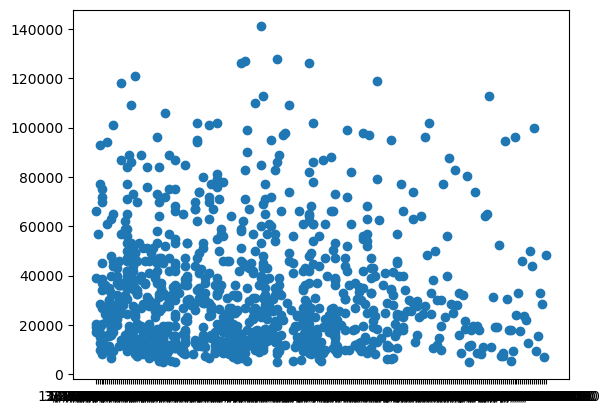

In [5]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [6]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

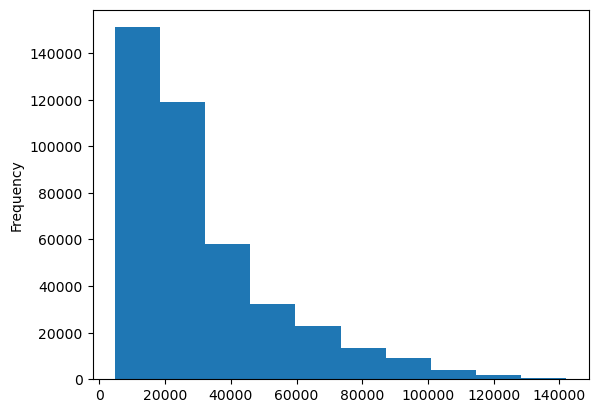

In [7]:
df.SalePrice.plot.hist();

### Parsing Dates

Since we are dealing with time series data, parsing the dates is crucial.

In [8]:
# Import data again but this time parse dates
df = pd.read_csv("../data/bulldozer-price/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

In [9]:
df.saledate.dtype

dtype('<M8[ns]')

In [10]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

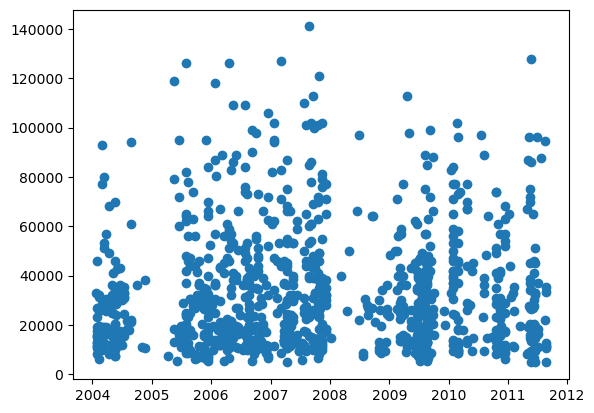

In [11]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [12]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [13]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by `saledate`

As we're working on a time series problem and trying to predict future examples given past examples, it makes sense to sort our data by date.

In [14]:
# Sort DataFrame by date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a Copy of the Original Data

Copy the original DataFrame so when we manipulate the copy, the original data still exists.

In [15]:
# Make a copy
df_tmp = df.copy()

### Add `datetime` Parameters For `saledate` Column

In [16]:
# Add new features to the dataframe
df_tmp["saleYear"] = df_tmp["saledate"].dt.year
df_tmp["saleMonth"] = df_tmp["saledate"].dt.month
df_tmp["saleDay"] = df_tmp["saledate"].dt.day
df_tmp["saleDayOfWeek"] = df_tmp["saledate"].dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp["saledate"].dt.dayofyear

# Now we can remove the original saledate feature
df_tmp.drop("saledate", axis=1, inplace=True)

In [17]:
# Check the values of different column
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [18]:
len(df_tmp)

412698

## 5. Modeling

Model-driven EDA.

First, we want to convert the columns with the string datatype into a category datatype.

To do this we can use the [pandas types API](https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality) which allows us to interact and manipulate the types of data.

### Convert Strings to Categories

In [19]:
pd.api.types.is_object_dtype(df_tmp["UsageBand"])

# It's recognized as object and not string 
# because some columns contain `nan`

True

In [20]:
# These columns contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [21]:
# Change string values to category values
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [22]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [23]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [24]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

All of our data is categorical and thus we can now turn the categories into numbers, however it's still missing values...

In [25]:
# Check the missing data
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save Preprocessed Data

In [26]:
# Export current dataset to dataframe
df_tmp.to_csv("../data/bulldozer-price/bluebook-for-bulldozers/train_and_validation_tmp.csv",
              index=False)

In [27]:
# Import preprocessed data
df_tmp = pd.read_csv("../data/bulldozer-price/bluebook-for-bulldozers/train_and_validation_tmp.csv",
                    low_memory=False)

### Fill Missing Values - Numeric

In [28]:
# These columns are numeric type
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [29]:
# Check which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [30]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median (more robust than mean)
            df_tmp[label] = content.fillna(content.median())

In [31]:
# Check which numeric columns have null values 
# If the rows were correctly filled - should be empty
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [32]:
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

### Fill Missing Values - Turning Categorical Variables to Numbers

In [33]:
# Check columns which are NOT numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [34]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes+1        

In [35]:
pd.Categorical(df_tmp["state"]).codes + 1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [36]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [37]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [38]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


### Build a Robust Preprocess

To streamline data preparation, we can develop a reusable preprocessing function that consistently transforms the data into the desired format. This function can be applied to the training, validation, and testing datasets.

In [39]:
# Preprocessing the data
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    # Add new features to the dataframe
    df["saleYear"] = df["saledate"].dt.year
    df["saleMonth"] = df["saledate"].dt.month
    df["saleDay"] = df["saledate"].dt.day
    df["saleDayOfWeek"] = df["saledate"].dt.dayofweek
    df["saleDayOfYear"] = df["saledate"].dt.dayofyear

    # Now we can remove the original saledate feature
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing
                df[label+"_is_missing"] = pd.isnull(content)
                
                # Fill missing numeric values with median (more robust than mean)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers and fill missing
        if not pd.api.types.is_numeric_dtype(content):
            # Add binary column to inidicate whether sample had missing value
            df[label+"_is_missing"] = pd.isnull(content)
            
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
            
    return df


def fill_missing_columns(df, columns_to_fill):
    """
    Fill all values with False for specified columns in the DataFrame.
    """
    for column in columns_to_fill:
        df[column] = False
    return df

### Splitting Data Into Train/Valid Sets

According to the [Kaggle data page](https://www.kaggle.com/c/bluebook-for-bulldozers/data), the validation set and test set are split according to dates.

This makes sense since we're working on a time series problem.

E.g. using past events to try and predict future events.

Knowing this, randomly splitting our data into train and test sets using something like `train_test_split()` wouldn't work.

Instead, we split our data into training, validation and test sets using the date each sample occured.

In our case:
* Training = all samples up until 2011
* Valid = all samples form January 1, 2012 - April 30, 2012
* Test = all samples from May 1, 2012 - November 2012

In [40]:
df_tmp = pd.read_csv("../data/bulldozer-price/bluebook-for-bulldozers/TrainAndValid.csv",
                     low_memory=False,
                     parse_dates=["saledate"])
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Split data into training and validation
df_val = df_tmp[df_tmp["saledate"].dt.year == 2012]
df_train = df_tmp[df_tmp["saledate"].dt.year != 2012]

len(df_val), len(df_train), len(df_tmp), len(df_val) + len(df_train)

(11573, 401125, 412698, 412698)

In [42]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 52), (401125,), (11573, 52), (11573,))

In [43]:
X_train = preprocess_data(X_train)
X_valid = preprocess_data(X_valid)

In [44]:
X_train.shape, X_valid.shape

((401125, 102), (11573, 101))

In [45]:
set(X_train.columns) - set(X_valid.columns)

{'auctioneerID_is_missing'}

In [46]:
X_valid = fill_missing_columns(X_valid, (set(X_train.columns) - set(X_valid.columns)))

# Make sure the features are with the same order
X_valid = X_valid[X_train.columns]

In [47]:
X_train.shape, X_valid.shape

((401125, 102), (11573, 102))

### Fitting a Model

Now all of our data is numeric and there are no missing values, we should be able to build a machine learning model!

Let's reinstantiate our trusty [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

This will take a few minutes which is too long for interacting with it. So what we'll do is create a subset of rows to work with.

In [48]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(X_train, y_train)

CPU times: total: 42min 40s
Wall time: 2min 53s


RandomForestRegressor(n_jobs=-1, random_state=42)

### Building an Evaluation Function

In [49]:
# Create evaluation function (the compatition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    """
    Calculates root mean square log error between predictions 
    and true lables
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create a function to evaluate the model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)  
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_valid, val_preds),
        "Training RMSLE": rmsle(y_train, train_preds),
        "Valid RMSLE": rmsle(y_valid, val_preds),
        "Training R^2": model.score(X_train, y_train),
        "Valid R^2": model.score(X_valid, y_valid)
    }
    return scores

In [50]:
show_scores(model)

{'Training MAE': 1578.4531655967596,
 'Valid MAE': 11122.651775684782,
 'Training RMSLE': 0.0841337553361389,
 'Valid RMSLE': 0.48796399425897724,
 'Training R^2': 0.9875229534799869,
 'Valid R^2': 0.49153463034878186}

### Testing Our Model on a Subset (To Tune The Hyperparameters)

Let's alter the number of samples each `n_estimator` in the [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) see's using the `max_samples` parameter.

In [51]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [52]:
%%time
# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train, y_train)

CPU times: total: 2min 8s
Wall time: 9.15 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [53]:
show_scores(model)

{'Training MAE': 5553.968864817699,
 'Valid MAE': 9931.279501425732,
 'Training RMSLE': 0.25758454804977915,
 'Valid RMSLE': 0.3966435353622303,
 'Training R^2': 0.8608439564932313,
 'Valid R^2': 0.6496752092189801}

### Hyperparameter tuning with RandomizedSearchCV

Now let's use RandomizedSearchCV to try and tune our RandomForestRegressor model.

We'll pass it the different hyperparameters from `log_reg_grid` as well as set `n_iter = 20`. This means, `RandomizedSearchCV` will try 20 different combinations of hyperparameters from `log_reg_grid` and save the best ones.

In [54]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Create a hyperparameter grid for Random Forest
rf_grid = {
     "n_estimators": np.arange(10, 100, 10),
     "max_depth": [None, 3, 5, 10],
     "min_samples_split": np.arange(2, 20, 2),
     "min_samples_leaf": np.arange(1, 20, 2),
     "max_features": [0.5, 1, "sqrt", "log2"],
     "max_samples": [10000]
}

# Setup random hyperparameter search for RandomForestRegressor
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=40,
                                verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
CPU times: total: 1min 53s
Wall time: 4min 2s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=40,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [55]:
# Find the best parameters from the randomized search 
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 8,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [56]:
# Evaluate the RandomizedSearchCV
show_scores(rs_model)

{'Training MAE': 6579.87003369445,
 'Valid MAE': 10450.896915616577,
 'Training RMSLE': 0.2958374847335549,
 'Valid RMSLE': 0.4077493015623195,
 'Training R^2': 0.8097575849599474,
 'Valid R^2': 0.6455978648310856}

### Train a Model With the Best Parameters

**Note:** These were found after 40 iterations of `RandomizedSearchCV`. It's possible to run this for more iterations but it could take some time.

In [57]:
%%time

# Most ideal hyperparameters (Hopefully)
ideal_model = RandomForestRegressor(
    random_state=42,
    n_estimators=rs_model.best_params_["n_estimators"],
    min_samples_leaf=rs_model.best_params_["min_samples_leaf"],
    min_samples_split=rs_model.best_params_["min_samples_split"],
    max_features=rs_model.best_params_["max_features"],
    max_samples=None,
    n_jobs=-1,
)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 6min 11s
Wall time: 27.7 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=13,
                      min_samples_split=8, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [58]:
# Evaluate the ideal_model
show_scores(ideal_model)

{'Training MAE': 4101.61351118029,
 'Valid MAE': 10112.100281102967,
 'Training RMSLE': 0.19535018174835828,
 'Valid RMSLE': 0.395083055644371,
 'Training R^2': 0.9202670567548384,
 'Valid R^2': 0.6542783657344622}

In [59]:
# Scores on rs_model (only trained on ~10,000 samples)
show_scores(rs_model)

{'Training MAE': 6579.87003369445,
 'Valid MAE': 10450.896915616577,
 'Training RMSLE': 0.2958374847335549,
 'Valid RMSLE': 0.4077493015623195,
 'Training R^2': 0.8097575849599474,
 'Valid R^2': 0.6455978648310856}

## Make Prdictions on Test Data

In [60]:
df_test = pd.read_csv("../data/bulldozer-price/bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [61]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [62]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [63]:
df_test = fill_missing_columns(df_test, (set(X_train.columns) - set(df_test.columns)))

# Make sure the features are with the same order
df_test = df_test[X_train.columns]

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [64]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [65]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,18414.681430
1,1227844,15724.325033
2,1227847,46311.303653
3,1227848,71473.706783
4,1227863,50068.417266
...,...,...
12452,6643171,36191.134495
12453,6643173,14200.007989
12454,6643184,12773.377045
12455,6643186,18819.977369


In [66]:
# Export predictions
df_preds.to_csv("../data/bulldozer-price/bluebook-for-bulldozers/predictions.csv")

### Feature Importance
Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable** (SalePrice).

In [67]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.09153879e-02, 2.03256433e-02, 4.16838387e-02, 1.46741668e-03,
       1.54172737e-03, 2.11225704e-01, 1.92005236e-03, 5.76265541e-04,
       3.89475284e-02, 4.42649181e-02, 6.29873753e-02, 5.02397107e-03,
       1.15774049e-02, 1.59809323e-01, 4.70743401e-02, 2.94362557e-03,
       1.98620188e-03, 2.85713700e-03, 3.56910111e-03, 7.22615078e-02,
       5.89893322e-04, 9.48533244e-05, 4.54090283e-04, 1.86255296e-04,
       9.71655438e-04, 2.83114342e-04, 1.84464477e-03, 4.30604056e-03,
       7.80601308e-04, 3.74272246e-03, 5.51112218e-03, 3.53512025e-03,
       2.45248918e-03, 8.83133366e-04, 3.90233314e-03, 5.93147816e-03,
       4.65235222e-04, 1.66536938e-02, 1.11872671e-03, 2.29859913e-03,
       7.99378844e-04, 1.22014020e-03, 3.71778196e-03, 3.18584678e-04,
       3.51676120e-04, 1.27334115e-04, 2.36851601e-04, 2.40756349e-03,
       7.78524699e-04, 1.93594757e-04, 2.90889307e-04, 7.26266037e-02,
       2.34132978e-03, 2.39546668e-03, 1.17062436e-03, 5.96008790e-03,
      

In [68]:
# Helper function for plotting feature importance
def plot_features(columns, importance, n=20):
    df = (pd.DataFrame({
            "features": columns,
            "feature_importance": importance
        })
      .sort_values("feature_importance", ascending=False)
      .reset_index(drop=True)
    )
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

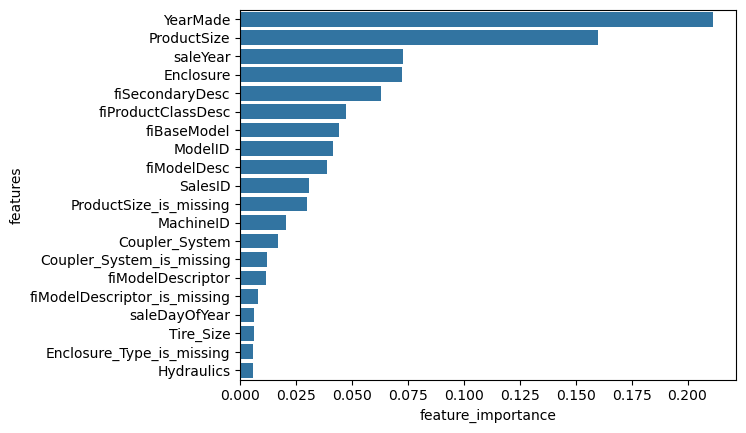

In [69]:
plot_features(X_train.columns, ideal_model.feature_importances_)